# ArXiv Topic Clustering - Unsupervised Learning Capstone #

### Table of Contents ###
[1. Overview](#Overview)<br/>
[2. Importing Modules and Reading the Dataset](#importing-modules-and-reading-the-dataset)<br/>
[3. Data Cleaning and Exploration](#data-cleaning-and-exploration)<br/>
[4. Text Preprocessing - Tokenization and Parsing](#text-preprocessing)<br/>
[5. Train/Test Split](#train/test-split)<br/>
[6. Feature Selection - Truncated SVD](#truncatedsvd)<br/>
[7. Building Cluster Models](#building-cluster-models)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[a. K-Means Clustering](#kmeans)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[b. DBSCAN (Density-based Spatial Clustering of Applications with Noise)](#dbscan)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[c. Gaussian Mixture Model (GMM) Clustering](#gmm)<br/>
[8. Analysis](#Analysis)<br/>
[9. Conclusion](#Conclusion)<br/>
[10. Next Steps](#next-steps)<br/>

### Overview ###

ArXiv is a repository consisting of over 1.5 million scientific papers in fields such as mathematics, computer science, and physics. It is owned and operated by Cornell University.

This capstone will explore the use of different clustering methods to predict the topic of each paper. I will be attempting to use K-Means, DBSCAN (Density-based Spatial Clustering of Applications with Noise), and the Gaussian Mixture Model.

<a name="importing-modules-and-reading-the-dataset"></a>
### Importing Modules and Reading the Dataset ###

In [1]:
import pandas as pd
import numpy as np
import arxiv
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("en_core_web_md")

In [2]:
result = arxiv.query("all",max_results=100000)

df = pd.DataFrame(result)

There are many different topics discussed in the arXiv scientific papers. I will be focusing solely on mathematics, computer science, and physics. As such I have imported 100,000 papers so I will be able to grab only 1000 of each topic.

In [3]:
df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,None,"{'term': 'math.NA', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1210.7708v1,Alexei Shadrin,{'name': 'Alexei Shadrin'},[Alexei Shadrin],None,True,http://arxiv.org/abs/1210.7708v1,...,http://arxiv.org/pdf/1210.7708v1,2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)",The Landau-Kolmogorov problem consists of find...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.NA', 'scheme': 'http://arxiv.o...",Landau--Kolmogorov inequality revisited,"{'type': 'text/plain', 'language': None, 'base...",2012-10-29T16:12:41Z,"(2012, 10, 29, 16, 12, 41, 0, 303, 0)"
1,None,"23 pages, 7 figures","{'term': 'cond-mat.mtrl-sci', 'scheme': 'http:...",http://arxiv.org/abs/1602.00450v1,M. Kawasaki,{'name': 'M. Kawasaki'},"[T. C. Fujita, M. Uchida, Y. Kozuka, W. Sano, ...",10.1103/PhysRevB.93.064419,True,http://arxiv.org/abs/1602.00450v1,...,http://arxiv.org/pdf/1602.00450v1,2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)","Pyrochlore oxides possessing ""all-in-all-out"" ...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cond-mat.mtrl-sci', 'scheme': 'http...",All-in-all-out magnetic domain wall conduction...,"{'type': 'text/plain', 'language': None, 'base...",2016-02-01T09:53:30Z,"(2016, 2, 1, 9, 53, 30, 0, 32, 0)"
2,None,None,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1612.01842v2,Zaid Hussain,{'name': 'Zaid Hussain'},[Zaid Hussain],None,True,http://arxiv.org/abs/1612.01842v2,...,http://arxiv.org/pdf/1612.01842v2,2016-12-06T15:01:47Z,"(2016, 12, 6, 15, 1, 47, 1, 341, 0)","Recently, a higher dimensional Eisenstein-Jaco...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.DC', 'scheme': 'http://arxiv.org...",An Improved One-to-All Broadcasting in Higher ...,"{'type': 'text/plain', 'language': None, 'base...",2016-12-07T06:10:53Z,"(2016, 12, 7, 6, 10, 53, 2, 342, 0)"
3,None,"33 pages, 18 figures","{'term': 'math.CO', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/0705.3599v1,Chris Smyth,{'name': 'Chris Smyth'},"[James McKee, Chris Smyth]",None,True,http://arxiv.org/abs/0705.3599v1,...,http://arxiv.org/pdf/0705.3599v1,2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)",We completely describe all integer symmetric m...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.CO', 'scheme': 'http://arxiv.o...",Integer symmetric matrices having all their ei...,"{'type': 'text/plain', 'language': None, 'base...",2007-05-24T15:45:39Z,"(2007, 5, 24, 15, 45, 39, 3, 144, 0)"
4,None,"10 pages, Journal ""Algebra and Discrete Mathem...","{'term': 'math.RA', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/0811.3325v1,Slavcho Shtrakov,{'name': 'Slavcho Shtrakov'},"[Jorg Koppitz, Slavcho Shtrakov]",None,True,http://arxiv.org/abs/0811.3325v1,...,http://arxiv.org/pdf/0811.3325v1,2008-11-20T12:28:46Z,"(2008, 11, 20, 12, 28, 46, 3, 325, 0)",The extensions of hypersubstitutions are mappi...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'math.RA', 'scheme': 'http://arxiv.o...",On mappings of terms determined by hypersubsti...,"{'type': 'text/plain', 'language': None, 'base...",2008-11-20T12:28:46Z,"(2008, 11, 20, 12, 28, 46, 3, 325, 0)"


<a name="data-cleaning-and-exploration"></a>
### Data Cleaning and Exploration ###

In [4]:
df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed'],
      dtype='object')

As seen above, there are many features in this dataset. To predict the topic, I will only be using the text in the summary and title. All of the other features will not be beneficial to the clustering models. Below, I have added a feature "text" that is the concatenation of the summary and title. And I have dropped all of the other features.

In [5]:
df['text'] = df['summary'] + " " + df['title']
df = df.drop(columns=['affiliation','arxiv_comment','arxiv_url',
                     'author_detail','doi','guidislink','id',
                     'pdf_url','links','published','summary_detail',
                     'title_detail','updated','updated_parsed',
                     'journal_reference','tags','author','authors',
                     'published_parsed','summary','title'])

In [6]:
df['length'] = df['text'].apply(len)

In [7]:
df.head()

,arxiv_primary_category,text,length
0,"{'term': 'math.NA', 'scheme': 'http://arxiv.or...",The Landau-Kolmogorov problem consists of find...,1228
1,"{'term': 'cond-mat.mtrl-sci', 'scheme': 'http:...","Pyrochlore oxides possessing ""all-in-all-out"" ...",992
2,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...","Recently, a higher dimensional Eisenstein-Jaco...",1223
3,"{'term': 'math.CO', 'scheme': 'http://arxiv.or...",We completely describe all integer symmetric m...,499
4,"{'term': 'math.RA', 'scheme': 'http://arxiv.or...",The extensions of hypersubstitutions are mappi...,513


I will be utilizing the "arxiv_primary_category" feature as my outcome variable. However the dataset's version of the feature is too complex. Below, I strip down each primary category.

In [8]:
df['arxiv_primary_category'] = df['arxiv_primary_category'].astype(str).str.replace('{\'term\': \'','').str.replace(r'\.(.*)','').str.replace(r'\',(.*)','')

In [9]:
df['arxiv_primary_category'].unique()

array(['math', 'cond-mat', 'cs', 'astro-ph', 'hep-th', 'physics',
       'quant-ph', 'dg-ga', 'hep-ph', 'hep-lat', 'math-ph', 'stat',
       'q-bio', 'q-alg', 'gr-qc', 'alg-geom', 'q-fin', 'hep-ex', 'nlin',
       'nucl-th', 'econ', 'nucl-ex', 'acc-phys', 'chao-dyn', 'chem-ph',
       'cmp-lg', 'funct-an', 'mtrl-th', 'solv-int', 'eess'], dtype=object)

With the categories stripped down there are much fewer unique outcomes.

In [10]:
df['arxiv_primary_category'].value_counts()

math        4359
cs           657
hep-th       536
cond-mat     401
quant-ph     376
physics      322
hep-ph       322
astro-ph     270
math-ph      180
gr-qc        162
hep-lat       89
nlin          73
nucl-th       47
q-bio         44
stat          37
hep-ex        30
alg-geom      20
q-alg         18
q-fin         16
solv-int       8
dg-ga          7
chao-dyn       7
funct-an       4
nucl-ex        4
econ           4
eess           3
mtrl-th        1
chem-ph        1
cmp-lg         1
acc-phys       1
Name: arxiv_primary_category, dtype: int64

Here I am looking at the value counts so I can resample the topics I will be focusing on. Of the 100,000 papers I pulled, 4359 are mathematics, 657 are computer science, and 322 are physics. I will need to downsample the mathematics and upsample the computer science and physics.

In [11]:
df_math = df.loc[df['arxiv_primary_category'] == 'math']
df_cs = df.loc[df['arxiv_primary_category'] == 'cs']
df_physics = df.loc[df['arxiv_primary_category'] == 'physics']

In [12]:
from sklearn.utils import resample

df_math = resample(df_math, replace=False, n_samples=1000, random_state=123)
df_cs = resample(df_cs, replace=True, n_samples=1000, random_state=123)
df_physics = resample(df_physics, replace=True, n_samples=1000, random_state=123)

df2 = pd.concat([df_math, df_cs, df_physics])

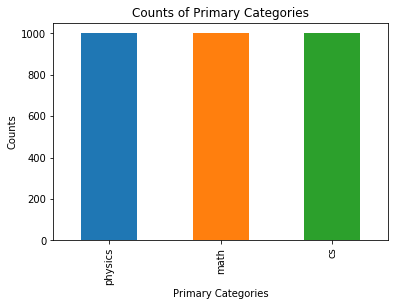

In [13]:
ax = df2['arxiv_primary_category'].value_counts().plot(kind='bar',title='Counts of Primary Categories')
ax.set_ylabel('Counts')
ax.set_xlabel('Primary Categories');

Now my new dataframe only consists of 1000 papers of each mathematics, computer science, and physics.

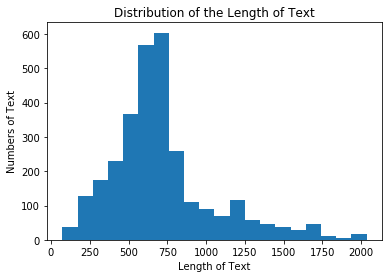

In [14]:
plt.hist(df2['length'],bins=20)
plt.title('Distribution of the Length of Text')
plt.ylabel('Numbers of Text')
plt.xlabel('Length of Text');

Above is a distribution of the length of each text. The distribution is very skewed to the right. This may become problematic as this suggests the majority of the texts are not very long.

<a name="text-preprocessing"></a>
### Text Preprocessing - Tokenization and Parsing ###

In [15]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df2['text'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df2['tokens'] = tokens
df2['lemma'] = lemma
df2['pos'] = pos

Here I am tokenizing and parsing the text in the "text" feature. This is adding 3 new columns of the tokens, lemmas, and parts of speech for each title and summary. As well as another feature "text_parsed" which contains the word vectors.

In [16]:
df2['text_parsed'] = df2['text'].apply(lambda x: nlp(x).vector)

In [17]:
df2.isnull().sum()

arxiv_primary_category    0
text                      0
length                    0
tokens                    0
lemma                     0
pos                       0
text_parsed               0
dtype: int64

There are no null values.

In [18]:
df2.dtypes

arxiv_primary_category    object
text                      object
length                     int64
tokens                    object
lemma                     object
pos                       object
text_parsed               object
dtype: object

All of the features as well as the outcome variable are object types.

<a name="train/test-split"></a>
### Train/Test Split ###

In [19]:
X = df2['text_parsed']
y = df2.arxiv_primary_category

I am assigning the parsed text feature to X and the primary category (the outcome variable) to y.

In [20]:
X_arrays = np.vstack(X.values)

This is concatenating the word vectors into single arrays.

In [21]:
from sklearn.preprocessing import normalize
X_norm = normalize(X_arrays)

Next I normalized the X for the clustering models.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=111)

I split my training and test sets as 75% and 25% respectively.

In [23]:
X_norm.shape

(3000, 300)

<a name="truncatedsvd"></a>
### Feature Selection - Truncated SVD ###

In [24]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(100)
lsa = make_pipeline(svd)
X_lsa = lsa.fit_transform(X_train)

print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

[0.00724199 0.18445656 0.10851406 0.07325787 0.04301357 0.03581863
 0.02817157 0.02557249 0.02259977 0.02112401 0.01623097 0.01493102
 0.01304254 0.01251824 0.01241077 0.01117041 0.00993868 0.00939514
 0.00922559 0.00845329 0.00799768 0.00773701 0.00748289 0.00713867
 0.0070263  0.00677979 0.00610622 0.00579862 0.00556604 0.00543871
 0.00519577 0.00514317 0.005032   0.00483707 0.00467858 0.00439921
 0.00422908 0.00410405 0.0040421  0.0039012  0.0038355  0.00374314
 0.00368304 0.0035727  0.00352762 0.00337466 0.00331062 0.00324222
 0.00310655 0.00306814 0.00302083 0.00297265 0.00280811 0.0027662
 0.00270184 0.00267396 0.00258534 0.00256263 0.0025005  0.00244175
 0.00238781 0.00234612 0.00232939 0.00227409 0.00221948 0.0022079
 0.00211758 0.00208775 0.00207742 0.00202813 0.00197993 0.00192874
 0.00190435 0.00186969 0.00184475 0.00182009 0.00179394 0.00172991
 0.0017208  0.00170334 0.00163464 0.00162589 0.00158991 0.00156621
 0.0015458  0.0015286  0.00151887 0.00149191 0.00148985 0.001464

X originally had 300 features. I used Truncated SVD to reduce X down to 100 components which explains approximately 91% of the variance.

<a name="building-cluster-models"></a>
### Building Cluster Models ###

As previously stated, this dataset will be used on 3 different types of clustering methods which are also of 3 different levels (hard to soft).

<a name="kmeans"></a>
#### K-Means Clustering ####

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

km = KMeans(n_clusters=3, random_state=42)
km.fit(X_lsa)
y_pred = km.predict(X_lsa)

First I try k-means clustering which is a type of hard clustering. With k-means, I define the number of clusters or centroids which is 3 for the number of topics I am focusing on. This model defaults to 10 times that the algorithm runs with different centroids and 300 iterations on a single run.

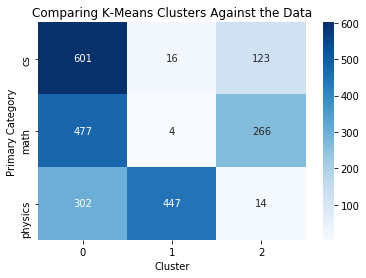

In [26]:
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing K-Means Clusters Against the Data');

In [27]:
scores = pd.DataFrame(data={'K-Means 3': [homogeneity_score(y_train, km.labels_)]})
print("Homogeneity score: %0.3f" % homogeneity_score(y_train, km.labels_))

Homogeneity score: 0.247


As seen above, this model does not do a great job of clustering the dataset for each topic. Cluster 0 has a majority of math papers, however there are also a number of computer science papers as well. Cluster 1 seems to be very physics focused (as seen later this is pretty consistent across all three models). Cluster 2 has a large number of each topic. The homogeneity score is very low with a 24.7% accuracy. The drawback for this clustering model in terms of the dataset is the assumption that the clusters are radially symmetrical and have similar variances.

Below I will try running the model with 5 and 10 clusters to see any patterns with the data.

In [28]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(X_lsa)
y_pred = km.predict(X_lsa)

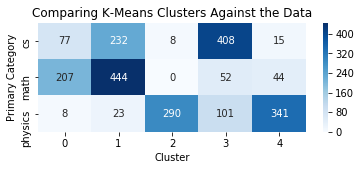

In [29]:
plt.figure(figsize=(6,2))
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing K-Means Clusters Against the Data');

In [30]:
scores['K-Means 5'] = [homogeneity_score(y_train, km.labels_)]
print("Homogeneity score: %0.3f" % homogeneity_score(y_train, km.labels_))

Homogeneity score: 0.432


With 5 clusters the topics seem to do a better job of separating. Still a mix across all of the clusters however cluster 1 has a majority of math papers, cluster 2 and 4 have a majority of physics papers, and cluster 3 has a majority of computer science papers. Also the homogeneity score increased to 43.2% accuracy.

In [31]:
km = KMeans(n_clusters=10, random_state=42)
km.fit(X_lsa)
y_pred = km.predict(X_lsa)

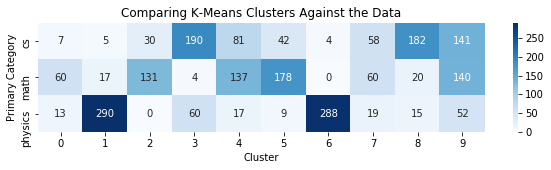

In [32]:
plt.figure(figsize=(10,2))
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing K-Means Clusters Against the Data');

In [33]:
scores['K-Means 10'] = [homogeneity_score(y_train, km.labels_)]
print("Homogeneity score: %0.3f" % homogeneity_score(y_train, km.labels_))

Homogeneity score: 0.453


As the number of clusters increases to 10 the topics are doing an even better job of separating especially the physics papers. The homogeneity score increased slightly more to 45.3% accuracy.

<a name="dbscan"></a>
#### DBSCAN (Density-based Spatial Clustering of Applications with Noise) ####

In [34]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.35, min_samples=3)
dbs.fit(X_lsa)
y_pred = dbs.fit_predict(X_lsa)

n_clusters_ = len(set(dbs.labels_)) - (1 if -1 in dbs.labels_ else 0)
n_noise_ = list(dbs.labels_).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 19


Next I try DBSCAN clustering which is still a type of hard clustering however unlike k-means the clusters can take arbitrary shapes. Also unlike k-means, I am unable to define the number of clusters. I tried a number of different combination of parameters in regards to the epsilon (maximum distance) and number of minimum points.

* Low epsilon, high number of minimum points - results in 0 clusters and all datapoints become noise
* Low epsilon, low number of minimum points - large number of clusters but vast majority of datapoints become noise
* High epsilon, low number of minimum points - results in 1 cluster and no noise
* High epsilon, high number of minimum points - results in 1 cluster and no noise

After testing a few different combinations, an epsilon of 0.35 and a number of minimum points of 3 resulted in 2 clusters and minimal noise.

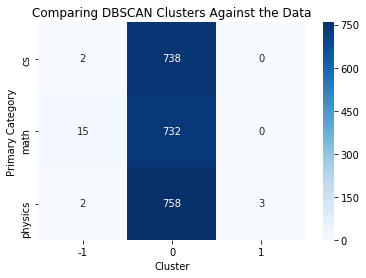

In [35]:
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt='d')
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing DBSCAN Clusters Against the Data');

In [36]:
scores['DBSCAN'] = [homogeneity_score(y_train, dbs.labels_)]
print("Homogeneity score: %0.3f" % homogeneity_score(y_train, dbs.labels_))

Homogeneity score: 0.005


As seen above, this model also did not do a great job of clustering based on the different topics. Even though I was able to create more than one cluster and minimal noise after tuning the parameters, almost all of the datapoints ended up in cluster 0. Similarly to k-means, physics had the only datapoints that were assigned to a cluster outside of cluster 0. The homogeneity score is extremely low with a 0.5% accuracy. As this model relies on density, that suggests the dataset as a whole is very dense and thus the parameters are extremely sensitive either causing the datapoints to become one cluster or all noise. The drawbacks on this model are its sensitivity to the parameters and it struggles with high dimensionality.

<a name="gmm"></a>
#### Gaussian Mixture Model (GMM) Clustering ####

In [50]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3)
gm.fit(X_lsa)
y_pred = gm.predict(X_lsa)

Lastly I try the Gaussian Mixture Model clustering which is a type of soft clustering. This type of clustering is very similar to k-means however, unlike k-means, it takes variance into consideration. The "weighted" distances may help with defining the clusters better. With this model, I was able to define the number of clusters to be 3 so the model knew to fit 3 Gaussians.

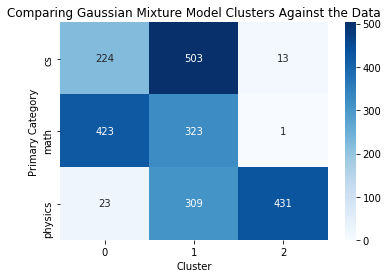

In [51]:
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing Gaussian Mixture Model Clusters Against the Data');

In [52]:
from sklearn.model_selection import cross_val_score
scores['GMM 3'] = [cross_val_score(gm, X_lsa, y_pred, scoring='accuracy').mean()]
print("Average score: %0.3f" % scores['GMM 3'])

Average score: 0.166


The clusters created by this model are practically the same as the k-means clusters. Once again, physics is mainly focused in cluster 2 but there are a large number of each topic in cluster 1 and a large number of math and computer science in cluster 0. The average cross validation score was 16.6% accuracy. It appears that the variance did not help the clusters become more defined by each topic.

As with k-means, below I will try running the model with 5 and 10 Gaussians to see any patterns with the data.

In [53]:
gm = GaussianMixture(n_components=5)
gm.fit(X_lsa)
y_pred = gm.predict(X_lsa)

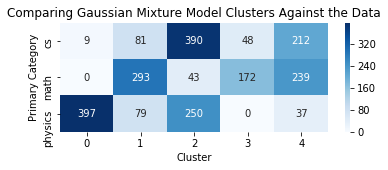

In [54]:
plt.figure(figsize=(6,2))
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing Gaussian Mixture Model Clusters Against the Data');

In [55]:
scores['GMM 5'] = [cross_val_score(gm, X_lsa, y_pred, scoring='accuracy').mean()]
print("Average score: %0.3f" % scores['GMM 5'])

Average score: 0.283


With 5 Gaussians the topics do a better job of separating. Still a mix across all of the clusters however cluster 2 has a majority of math papers, cluster 0 has a majority of physics papers, and cluster 1 has a majority of computer science papers. Also the average cross validation score increased to 28.3% accuracy.

In [56]:
gm = GaussianMixture(n_components=10)
gm.fit(X_lsa)
y_pred = gm.predict(X_lsa)

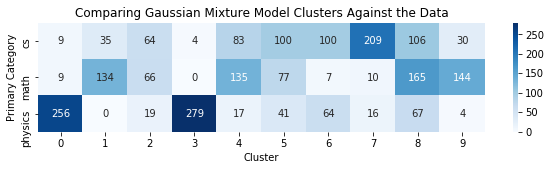

In [57]:
plt.figure(figsize=(10,2))
sns.heatmap(pd.crosstab(y_train, y_pred),cmap='Blues',annot=True,fmt="d")
plt.xlabel('Cluster')
plt.ylabel('Primary Category')
plt.title('Comparing Gaussian Mixture Model Clusters Against the Data');

In [58]:
scores['GMM 10'] = [cross_val_score(gm, X_lsa, y_pred, scoring='accuracy').mean()]
print("Average score: %0.3f" % scores['GMM 10'])

Average score: 0.141


With 10 Gaussians there was a little more divergence in the different topics. The average cross validation score decreased to 14.1% accuracy. The large differences between the average scores may suggest some overfitting in the model.

<a name="analysis"></a>
### Analysis ###

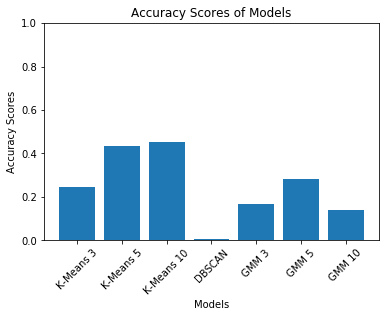

In [60]:
plt.bar(scores.columns,scores.values.flatten())
plt.ylim(0,1)
plt.title('Accuracy Scores of Models')
plt.xticks(rotation=45)
plt.ylabel('Accuracy Scores')
plt.xlabel('Models');

The graph above shows the scores for each model. Overall, K-Means had the highest scores which increased with the number of clusters. DBSCAN was the worst model. It appears to be too sensitive for a textual dataset. The Gaussian Mixture Model's average cross validation scores were inconsistent suggesting there may be some overfitting.

### Conclusion ###

In conclusion, the dataset appears to be quite dense and has difficulty clustering. The physics papers seem to be better at clustering from the math and computer science papers. I may be able to help diverge the different topics by using more word importance such as TF-IDF. Currently, physics may have more unique words than math and computer science.

### Next Steps ###
<a name="next-steps"></a>

* Topic Modeling Classifiers
* Word Importance (TF-IDF)